In [1]:
import sys
sys.path.append("../") # go to parent dir

from pathlib2 import Path

import random
from load_data import load_data
from divergence import total_variation_distance
from test_instances.ts_test import TSTest
from test_instances.fair_sd_ts_test import FairSDTest
from test_instances.sd_ts_test import SDTest
import numpy as np
import pickle


import os

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})


def save_plot(name):
    i = 0
    name = 'fin_sep_data_' + name
    name_i = name + '_' + format(i) + '.png'
    while Path('/Users/antonm/Desktop/BachelorThesis/Plots/'+name_i).exists():
        i += 1
        name_i = name + '_' + format(i) + '.png'
    plt.savefig('/Users/antonm/Desktop/BachelorThesis/Plots/'+ name_i, bbox_inches='tight')


In [2]:
def plot_new_lambda_regret_tradeoff(n_lam, e2_arr, delta_arr, sd_tests, fair_tests):
    fair_fr = np.zeros((len(e2_arr), len(delta), n_lam))
    fair_r = np.zeros((len(e2_arr), len(delta), n_lam))
    
    sd_fr = np.zeros(n_lam)
    sd_r = np.zeros(n_lam)
    
    for ind, sd_test in enumerate(sd_tests):
         lam_ind = np.where(lam_arr == sd_tests.lam)[0][0]
         sd_fr[lam_ind] = sd_test.average_fairness_regret[-1]
         sd_r[lam_ind] = sd_test.average_regret[-1]
    lam_arr = np.linspace(0, 1, n_lam)
    for ind, fair_test in enumerate(fair_tests):        
        for d_ind, d in enumerate(delta_arr):
            lam_ind = np.where(lam_arr == fair_test.lam)[0][0]
            fair_fr[fair_test.e2_arr[0], d_ind, lam_ind] = fair_test.average_fairness_regret[0, d_ind,-1]
            fair_r[fair_test.e2_arr[0], d_ind, lam_ind] = fair_test.average_regret[0, d_ind,-1]
    
    plt.plot(sd_fr, sd_r, label='Hybrid ' + sd_tests[0].get_name(), marker='x')
    
    for e2_ind, e2 in enumerate(e2_arr):
        for d_ind, d in enumerate(delta_arr):
            plt.plot(fair_fr[e2_ind, d_ind], fair_r[e2_ind, d_ind], label = 'Hybrid ' + fair_tests[0].get_name(e2=e2, delta=d)
                    ,marker = 'x')
    
    plt.xlabel('Cummulative Fairness Regret')
    plt.ylabel('Total Regret')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    save_plot('tradeoff')
    plt.show()

In [6]:

N_ITERATIONS = 400.
SETS = ['0', 'Bar Exam', 'Default on Credit', '3']
SETS  = ['Bar Exam']
T = 5000
e1 = []
e2 = [0.05, 0.1]
delta = [0.1, 0.3]
n = 11
lam_arr = np.linspace(0, 1, n)
sd_test_results = []
fair_sd_tests_results = []
for set in SETS:
    bandits = load_data(set)
    sd_tests=[]
    fair_sd_tests=[]
    for lam in lam_arr:
        sd_tests.append(SDTest(N_ITERATIONS, bandits, T, e1, e2, delta, lam=lam, distance=total_variation_distance))
        sd_tests[-1].analyse(fair_regret=True, regret=True, subjective_smooth_fair=False, smooth_fair=False, subjective_minimum_e1=False,
                         minimum_e1=False)
        fair_sd_tests.append(FairSDTest(N_ITERATIONS, bandits, T, e1, e2, delta, lam=lam))
        fair_sd_tests[-1].analyse(regret=True, fair_regret=True, smooth_fair=False, minimum_e1=False)
    sd_test_results.append(sd_tests)
    fair_sd_tests_results.append(fair_sd_tests)
    
    
# fair_sd_tests.append(TSTest(N_ITERATIONS, bandit, T, e1, e2, delta))
# fair_sd_tests[-1].analyse(regret=True, fair_regret=True, smooth_fair=False,
#                      subjective_smooth_fair=False, minimum_e1=False,
#                      subjective_minimum_e1=False)


[0.20891815 0.16983642 0.19696296 0.20127048 0.22301199]


KeyboardInterrupt: 

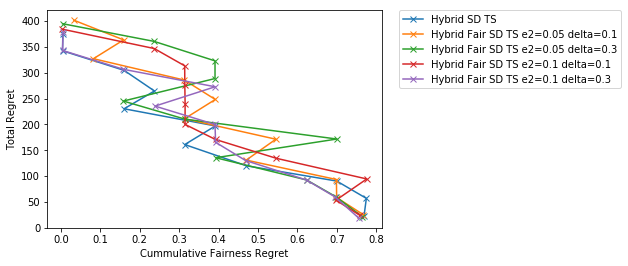

In [5]:
plot_new_lambda_regret_tradeoff(n, e2, delta, sd_tests, fair_sd_tests) #LONGER LAMBDA -> LONGER EXPLORE (PLOT EXPLORE)

In [ ]:
for test in fair_sd_tests:
    print test.average_rounds_exploring

In [ ]:
# plt_sep.plot_fairness_regret(fair_sd_tests)
# plt_sep.plot_average_total_regret(fair_sd_tests)


In [ ]:
# print fair_sd_tests[0].lam
# print fair_sd_tests[0].pi
# print fair_sd_tests[0].average_regret[0,0,-1]

# print fair_sd_tests[1].lam
# print fair_sd_tests[1].pi
# print fair_sd_tests[1].average_regret[0,0,-1]


# print fair_sd_tests[-2].lam
# print fair_sd_tests[-2].pi
# print fair_sd_tests[-2].average_regret[0,0,-1]

# print fair_sd_tests[-1].lam
# print fair_sd_tests[-1].pi
# print fair_sd_tests[-1].average_regret[0,0,-1]
